In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [94]:
import pandas_datareader.data as web
stock = ["AAPL", "FB", "MSFT", "NFLX"]
data = web.DataReader(stock,data_source="yahoo",start='29/11/2018')['Adj Close']

In [95]:
data.head()

Symbols,AAPL,FB,MSFT,NFLX
Date,,,,
2018-11-28,178.261627,136.759995,109.500916,282.649994
2018-11-29,176.892197,138.679993,108.584465,288.750000
2018-11-30,175.936554,140.610001,109.274261,286.130005
2018-12-03,182.084183,141.089996,110.456779,290.299988
2018-12-04,174.074539,137.929993,106.938789,275.329987


In [96]:
# Plotly graph
'''import plotly.graph_objects as go
fig = go.Figure()
idx = 0
for i in data.columns:
    fig.add_trace(go.Scatter(x=data.index, y=data[stock[idx]], name=stock[idx]))
    idx += 1
fig.update_layout(yaxis_title="Price in $")
fig.show()'''

'import plotly.graph_objects as go\nfig = go.Figure()\nidx = 0\nfor i in data.columns:\n    fig.add_trace(go.Scatter(x=data.index, y=data[stock[idx]], name=stock[idx]))\n    idx += 1\nfig.update_layout(yaxis_title="Price in $")\nfig.show()'

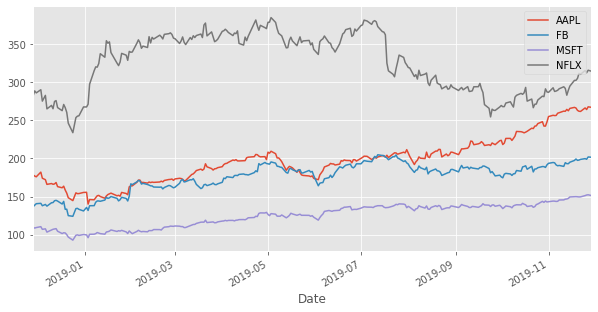

In [97]:
data.plot(figsize=(10,5))
plt.legend(loc="upper right")
plt.show()

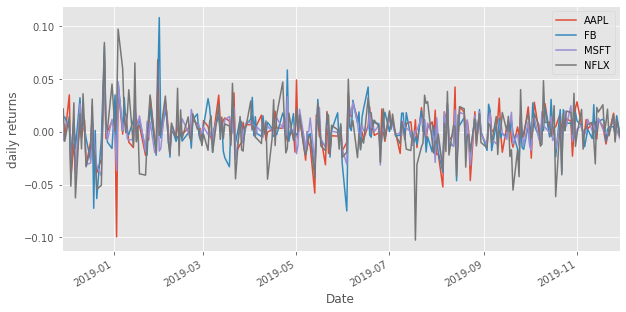

In [98]:
returns = data.pct_change()
returns.plot(figsize=(10,5))
plt.ylabel("daily returns")
plt.legend(loc="upper right")
plt.show()

In [99]:
def portfolio_annualized_performance(weights, mean_returns, cov_matrix):
    returns = np.sum(mean_returns*weights)*252
    std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))*np.sqrt(252)
    return std, returns

In [100]:
def random_portfolios(num_portfolio, mean_returns, cov_matrix, risk_free_rate):
    results = np.zeros((3, num_portfolio))
    weights_record = []
    for i in range(num_portfolio):
        weights = np.random.random(len(stock))
        weights /= np.sum(weights)
        weights_record.append(weights)
        portfolio_std_dev, portfolio_return = portfolio_annualized_performance(weights, mean_returns, cov_matrix)
        results[0, i] = portfolio_std_dev
        results[1, i] = portfolio_return
        results[2,i] = (portfolio_return-risk_free_rate)/portfolio_std_dev
    return results, weights_record

In [110]:
returns = data.pct_change()
mean_returns = returns.mean()
cov_matrix = returns.cov()
num_portfolio = 10000
risk_free_rate = 0.0178

In [111]:
def display_simulated_ef_with_random(mean_returns, cov_matrix, num_portfolio, risk_free_rate):
    results, weights = random_portfolios(num_portfolio, mean_returns, cov_matrix, risk_free_rate)
    
    max_sharpe_idx = np.argmax(results[2])
    sdp, rp = results[0, max_sharpe_idx], results[1, max_sharpe_idx]
    max_sharpe_allocation = pd.DataFrame(weights[max_sharpe_idx], index=data.columns, columns=['allocation'])
    max_sharpe_allocation['allocation'] = [round(i*100, 2) for i in max_sharpe_allocation['allocation']]
    max_sharpe_allocation = max_sharpe_allocation.T
    
    min_vol_idx = np.argmin(results[0])
    sdp_min, rp_min = results[0, min_vol_idx], results[1, min_vol_idx]
    min_vol_allocation = pd.DataFrame(weights[min_vol_idx], index=data.columns, columns=['allocation'])
    min_vol_allocation['allocation'] = [round(i*100, 2) for i in min_vol_allocation['allocation']]
    min_vol_allocation = min_vol_allocation.T
    
    print("Maximum Sharpe Ratio Portfolio Allocation")
    print("Annualized Return:", round(rp, 2))
    print("Annualized Volatility:", round(sdp, 2))
    print(max_sharpe_allocation)
    print("\n")
    print("Minimum Portfolio Portfolio Allocation")
    print("Annualized Return:", round(rp_min, 2))
    print("Annualized Volatility:", round(sdp_min, 2))
    print(min_vol_allocation)
    
    plt.figure(figsize=(10, 5))
    plt.scatter(results[0,:], results[1,:], c=results[2,:], cmap='YlGnBu', marker='o', s=10, alpha=0.3)
    plt.colorbar()
    plt.scatter(sdp, rp, marker='*', color='r', s=500, label="Maximum Sharpe Ratio")
    plt.scatter(sdp_min, rp_min, marker='*', color='g', s=500, label="Minimum Volatility")
    plt.title("Simulated Portfolio Optimization based on Efficient Frontier")
    plt.xlabel("Annualized Volatility")
    plt.ylabel("Annualized Returns")
    plt.legend(labelspacing=0.8)

Maximum Sharpe Ratio Portfolio Allocation
Annualized Return: 0.41
Annualized Volatility: 0.23
Symbols      AAPL     FB   MSFT  NFLX
allocation  36.58  28.78  34.41  0.23


Minimum Portfolio Portfolio Allocation
Annualized Return: 0.37
Annualized Volatility: 0.22
Symbols      AAPL     FB   MSFT  NFLX
allocation  11.82  14.25  73.69  0.23


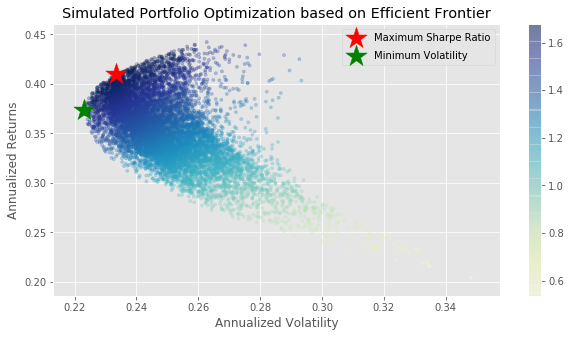

In [112]:
display_simulated_ef_with_random(mean_returns, cov_matrix, num_portfolio, risk_free_rate)